<!-- # CNN autoencoder and Clustering from MTRX data

Use this notebook to load Scienta Omicron Matrix format SPM data and create standardised images for machine learning training and analysis. The code can generate both JPG image data, useful for manually checking the data, and windowed numpy data that can be loaded into ML models. 

The notebook then creates an autoencoder for training on a large dataset, followed by KMEANS clustering. 

**Author**: Steven R. Schofield  
**Created**: November, 2024 -->

# CASTEP output analysis
## Steven R. Schofield (Universtiy College London) May 2025

### Load required modules

In [128]:
import sys
from pathlib import Path

# Define candidate paths using Path objects
module_path_list = [
    Path('/Users/steven/academic-iCloud/Python/modules'),
    Path('/hpc/srs/Python/modules')
]

data_path_list = [
    Path('/Users/steven/Castep-data/work'),
    Path('/hpc/srs/castep')
]

# Resolve actual paths
module_path = next((p for p in module_path_list if p.exists()), None)
data_path = next((p for p in data_path_list if p.exists()), None)

# Check and report missing paths
if module_path is None:
    print("Error: Could not locate a valid module path.")
if data_path is None:
    print("Error: Could not locate a valid data path.")

if module_path is None or data_path is None:
    sys.exit(1)

# Add module_path to sys.path if needed
if str(module_path) not in sys.path:
    sys.path.insert(0, str(module_path))

# Print resolved paths
print(f"module_path = {module_path}")
print(f"data_path = {data_path}")

module_path = /Users/steven/academic-iCloud/Python/modules
data_path = /Users/steven/Castep-data/work


In [129]:
# # Ensure modules are reloaded 
%load_ext autoreload
%autoreload 2

# Import standard modules
import numpy as np
import pandas as pd
import re
# Import custom module
import SRSCALCUTILS.castep_tools as ct

from IPython.display import display, Image as StaticImage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Programme variable setup

In [130]:
# Parameters for windows creation
# General
job_folder = 'si001_cut_off'
job_path = data_path / job_folder
verbose = False             # Set this True to print out more information

# Print resolved paths
print(f"job_path = {job_path}")

job_path = /Users/steven/Castep-data/work/si001_cut_off


In [131]:
file_list = ct.find_all_files_by_extension(job_path, extension=".castep")

In [132]:
show_info = False

energy_list = []
cutoff_list = []
for file in file_list:
    
    # Warnings and parameters
    warnings = ct.get_warnings(file, verbose=True)
    parameters = ct.get_calculation_parameters(file)

    # Get cut-off energy
    cutoff = parameters['plane wave basis set cut-off']
    cutoff_list.append(int(float(cutoff.split()[0])))

    # Get energy
    energy = ct.get_LBFGS_final_enthalpy(file)
    energy_list.append(energy)

    if show_info:
        ct.print_filename(file)
        print(f"Warnings: {warnings}")
        parameters_df = pd.DataFrame(list(parameters.items()), columns=['Parameter', 'Value'])
        display(parameters_df)

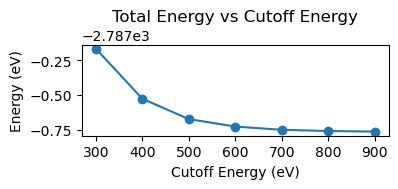

,cutoff (eV),energy (eV)
0,300,-2787.16619
1,400,-2787.52813
2,500,-2787.67457
3,600,-2787.72853
4,700,-2787.75196
5,800,-2787.76083
6,900,-2787.76471


In [133]:
ct.plot_sequence(
    energy_list,
    x=cutoff_list,
    xlabel='Cutoff Energy (eV)',
    ylabel='Energy (eV)',
    title='Total Energy vs Cutoff Energy',
    figsize=(4,2)
)

energy_df = pd.DataFrame({
    'cutoff (eV)': cutoff_list,
    'energy (eV)': energy_list
})
display(energy_df)

In [134]:
# Parameters for windows creation
# General
job_folder = 'si001_k_point'
job_path = data_path / job_folder
verbose = False             # Set this True to print out more information

# Print resolved paths
print(f"job_path = {job_path}")

job_path = /Users/steven/Castep-data/work/si001_k_point


In [135]:
file_list = ct.find_all_files_by_extension(job_path, extension=".castep")

In [136]:
show_info = False

kenergy_list = []
kpoints_list = []
for file in file_list:
    
    # Warnings and parameters
    warnings = ct.get_warnings(file, verbose=True)
    parameters = ct.get_calculation_parameters(file)

    # Get cut-off energy
    kpoints = parameters['k_points_mp_grid']
    kpoints_list.append(kpoints)

    # Get energy
    energy = ct.get_LBFGS_final_enthalpy(file)
    kenergy_list.append(energy)

    if show_info:
        ct.print_filename(file)
        print(f"Warnings: {warnings}")
        parameters_df = pd.DataFrame(list(parameters.items()), columns=['Parameter', 'Value'])
        display(parameters_df)

,kpoints,energy (eV)
0,"(4, 2, 1)",-2788.15866
1,"(8, 4, 1)",-2787.75200
2,"(8, 4, 4)",-2787.75198
3,"(8, 8, 8)",-2787.74821


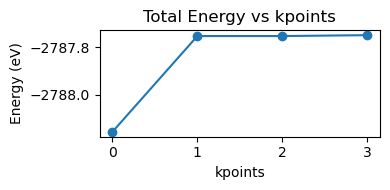

In [137]:
energy_df = pd.DataFrame({
    'kpoints': kpoints_list,
    'energy (eV)': kenergy_list
})
display(energy_df)

ct.plot_sequence(
    kenergy_list,
    x=None,
    xlabel='kpoints',
    ylabel='Energy (eV)',
    title='Total Energy vs kpoints',
    figsize=(4,2)
)



In [138]:
# Parameters for windows creation
# General
job_folder = 'si001_vac'
job_path = data_path / job_folder
verbose = False             # Set this True to print out more information

# Print resolved paths
print(f"job_path = {job_path}")

job_path = /Users/steven/Castep-data/work/si001_vac


In [139]:
file_list = ct.find_all_files_by_extension(job_path, extension=".castep")
file_list = ct.sort_file_list(file_list)
file_list

[PosixPath('/Users/steven/Castep-data/work/si001_vac/si001_122_vac_1.castep'),
 PosixPath('/Users/steven/Castep-data/work/si001_vac/si001_122_vac_2.castep'),
 PosixPath('/Users/steven/Castep-data/work/si001_vac/si001_122_vac_3.castep'),
 PosixPath('/Users/steven/Castep-data/work/si001_vac/si001_122_vac_4.castep'),
 PosixPath('/Users/steven/Castep-data/work/si001_vac/si001_122_vac_5.castep'),
 PosixPath('/Users/steven/Castep-data/work/si001_vac/si001_122_vac_6.castep'),
 PosixPath('/Users/steven/Castep-data/work/si001_vac/si001_122_vac_8.castep'),
 PosixPath('/Users/steven/Castep-data/work/si001_vac/si001_122_vac_10.castep'),
 PosixPath('/Users/steven/Castep-data/work/si001_vac/si001_122_vac_12.castep'),
 PosixPath('/Users/steven/Castep-data/work/si001_vac/si001_122_vac_14.castep'),
 PosixPath('/Users/steven/Castep-data/work/si001_vac/si001_122_vac_15.castep'),
 PosixPath('/Users/steven/Castep-data/work/si001_vac/si001_122_vac_16.castep'),
 PosixPath('/Users/steven/Castep-data/work/si00

In [140]:
show_info = False

venergy_list = []
vac_list = []
for file in file_list:
    # Get the vacuum spacing from the filename
    m = re.search(r'_(\d+)\.[^.]+$', str(file))
    vac = int(m.group(1))
    vac_list.append(vac)

    # Warnings and parameters
    warnings = ct.get_warnings(file, verbose=True)
    parameters = ct.get_calculation_parameters(file)

    # Get cut-off energy
    kpoints = parameters['k_points_mp_grid']
    kpoints_list.append(kpoints)

    # Get energy
    energy = ct.get_LBFGS_final_enthalpy(file)
    venergy_list.append(energy)

    if show_info:
        ct.print_filename(file)
        print(f"Warnings: {warnings}")
        parameters_df = pd.DataFrame(list(parameters.items()), columns=['Parameter', 'Value'])
        display(parameters_df)

,vac,energy (eV)
0,1,-2787.76631
1,2,-2787.78746
2,3,-2787.76759
3,4,-2787.75674
4,5,-2787.75326
5,6,-2787.75195
6,8,-2787.75175
7,10,-2787.75104
8,12,-2787.75152
9,14,-2787.75235


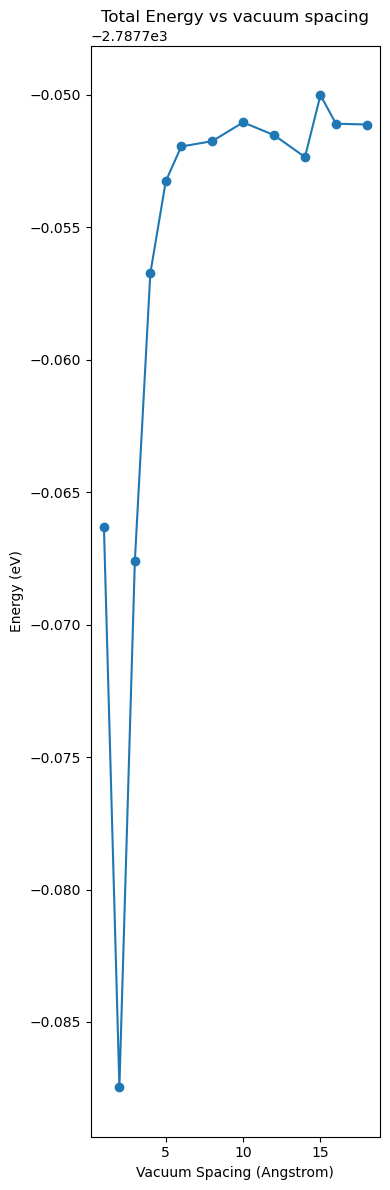

In [142]:
energy_df = pd.DataFrame({
    'vac': vac_list,
    'energy (eV)': venergy_list
})
display(energy_df)

ct.plot_sequence(
    venergy_list,
    x=vac_list,
    xlabel='Vacuum Spacing (Angstrom)',
    ylabel='Energy (eV)',
    title='Total Energy vs vacuum spacing',
    figsize=(4,12)
)

